In [1]:
import pandas as pd
import numpy as np
import json
import datetime

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

In [2]:
# FIRST 10 LOCAL AREA URL'S 
# Format the string so JSON can convert it into a python dict
with open("slurm-houses1A.out ", encoding="utf-8") as f:
    contents = f.read()
    # Remove the progress bars produced by the OCR
    start = contents.find("{")
    data10A = contents[start:-1]
    data10A = data10A.replace("False", "false")
    data10A = data10A.replace("True", "true")
    data10A = data10A.replace("None", "null")
    data10A = data10A.replace("nan", "null")
    data10A = data10A.replace("'", '"')
    
with open("slurm-houses1B.out ", encoding="utf-8") as f:
    contents1 = f.read()
    # Remove the progress bars produced by the OCR
    start = contents1.find("{")
    data10B = contents1[start:-1]
    data10B = data10B.replace("False", "false")
    data10B = data10B.replace("True", "true")
    data10B = data10B.replace("None", "null")
    data10B = data10B.replace("nan", "null")
    data10B = data10B.replace("'", '"')

data10AB = data10A[:-1]+', '+data10B[1:]
houses10AB = json.loads(data10AB)
len(houses10AB)

19111

In [272]:
# First 100 LOCAL AREA URL's
# Format the string so JSON can convert it into a python dict
with open("slurm-100A.out ", encoding="utf-8") as f:
    contents = f.read()
    # Remove the progress bars produced by the OCR and remove the error at the end
    start = contents.find("{")
    data1A = contents[start:-222]
    data1A = data1A.replace("False", "false")
    data1A = data1A.replace("True", "true")
    data1A = data1A.replace("None", "null")
    data1A = data1A.replace("nan", "null")
    data1A = data1A.replace("'", '"')

with open("slurm-100B.out ", encoding="utf-8") as f:
    contents1 = f.read()
    # Remove the progress bars produced by the OCR
    start = contents1.find("{")
    data1B = contents1[start:-190]
    data1B = data1B.replace("False", "false")
    data1B = data1B.replace("True", "true")
    data1B = data1B.replace("None", "null")
    data1B = data1B.replace("nan", "null")
    data1B = data1B.replace("'", '"')
    

data1AB = data1A[:-1]+', '+data1B[1:]
houses100AB = json.loads(data1AB)

In [240]:
with open("slurm-100_200A.out ", encoding="utf-8") as f:
    contents2A = f.read()
    # Remove the progress bars produced by the OCR
    start = contents2A.find("{")
    data2A = contents2A[start:]
    data2A = data2A.replace("False", "false")
    data2A = data2A.replace("True", "true")
    data2A = data2A.replace("None", "null")
    data2A = data2A.replace("nan", "null")
    data2A = data2A.replace("inf", "null")
    data2A = data2A.replace("'", '"')
    data2A = data2A.replace("\n", '')
houses100_200A = json.loads(data2A) 

with open("slurm-100_200B.out ", encoding="utf-8") as f:
    contents2B = f.read()
    # Remove the progress bars produced by the OCR
    start = contents2B.find("{")
    data2B = contents2B[start:-351]
    data2B = data2B.replace("False", "false")
    data2B = data2B.replace("True", "true")
    data2B = data2B.replace("None", "null")
    data2B = data2B.replace("nan", "null")
    data2B = data2B.replace("inf", "null")
    data2B = data2B.replace("'", '"')
houses200B = json.loads(data2B)

data100_200AB = data2A[:-1]+', '+data2B[1:]
houses200AB = json.loads(data100_200AB)
len(houses200AB)

63694

In [8]:
# Putting together the first 200 local url's of houses
data1AB_2AB = data1A[:-1]+', '+data1B[1:-1]+', '+data2A[1:-1]+', '+data2B[1:]
houses0_200AB = json.loads(data1AB_2AB)
len(houses0_200AB)

104191

In [236]:
with open("slurm-200_300Aclean.out") as f:
    data300A = f.read()
    #data300A = data300A.replace("\x00", "")
#data300A = data300A.decode('utf16-le')
#houses300A = json.loads(data300A, strict=False)
    
with open("slurm-200_300Bclean.out") as f:
    data300B = f.read()
houses300B = json.loads(data300B)
    
with open("slurm-300_400Aclean.out") as f:
    data400A = f.read()
houses400A = json.loads(data400A)
    
with open("slurm-300_400Bclean.out") as f:
    data400B = f.read()
houses400B = json.loads(data400B)
    
with open("slurm-400_500Aclean.out") as f:
    data500A = f.read()
houses500A = json.loads(data500A)
    
with open("slurm-400_500Bclean.out") as f:
    data500B = f.read()
houses500B = json.loads(data500B)
    
with open("slurm-500_600Aclean.out") as f:
    data600A = f.read()
    data600A = data600A.replace("inf", "null")
houses600A = json.loads(data600A)
    
with open("slurm-500_600Bclean.out") as f:
    data600B = f.read()
houses600B = json.loads(data600B)

with open("slurm-600_endAclean.out") as f:
    data700A = f.read()
houses700A = json.loads(data700A)
    
with open("slurm-600_endBclean.out") as f:
    data700B = f.read()
houses700B = json.loads(data700B)
    

In [241]:
from itertools import chain
complete_dataA = dict(chain.from_iterable(d.items() for d in (houses100AB, houses200AB, houses300B, houses400A, houses400B, houses500A, houses500B, houses600A, houses600B, houses700A, houses700B)))

In [ ]:
############################################################################################################

# Obtain the data in a Pandas DataFrame

In [578]:
# Need to convert the data into a quantitative format, which regression algorithms can learn/predict from
# This is done for each data set
properties = {}
index = 0
# loop through all of the 
for h, i in complete_dataA.items():
    house_data = []
    
    # Area code has been commented out after speaking to Adam
    # area_code - Want to know which codes
    postcode = h[-8:]
    if postcode[0] == " ":
        postcode = h[-7:]
    postcode_area = postcode.split(" ")[0]
    if postcode_area == 'n':
        postcode_area = postcode.split(" ")[1]
    house_data.append(postcode_area)


    
    if 'latitude' and 'longitude' in i.keys():
        house_data.append(i['latitude'])
        house_data.append(i['longitude'])
    else:
        house_data.append("Na")
        house_data.append("Na")
    
    
#     if i['property_type'] == 'Flat':
#         prop_type = 1
#     elif i['property_type'] == 'Terraced':
#         prop_type = 2
#     elif i['property_type'] == 'Semi-Detached':
#         prop_type = 3 
#     elif i['property_type'] == 'Detached':
#         prop_type = 4
#     else:
#         prop_type = 5
    house_data.append(i['property_type'])
    
    #house_data.append(i["NLP_Score"])
    
    # Convert the data into the necessary string format
    date_obj = datetime.datetime.strptime(i['date'], "%d %b %Y")
    date_str = date_obj.strftime("%Y-%m-%d")
    house_data.append(date_str)
    
    if 'station_proximities' in i.keys() and i['station_proximities'] != {}:
        station_distance = min(i['station_proximities'].values())
        house_data.append(station_distance)
    else:
        house_data.append("NA")
        
    # You should have handled for the property_size difficulties by now
    if 'property_size' not in i.keys():
        house_data.append("NA")
    elif i['property_size'] == {} or i['property_size'] == 'Na' or i["property_size"] == None:
        house_data.append("NA")
    else:
        # This should return the sq foot of the property
        house_data.append(i["property_size"])
    
    # Add the bedrooms and bathrooms data   
    if "bedrooms" not in i.keys():
        house_data.append("NA")
    elif i['bedrooms'] == None or i['bedrooms'] == '':
        house_data.append("NA")
    else:
        house_data.append(i["bedrooms"])
        
    if 'bathrooms' not in i.keys():
        house_data.append("NA")
    elif i['bathrooms'] == None or i['bathrooms'] == '':
        house_data.append("NA")
    else:
        house_data.append(i["bathrooms"])
        
        
    # New build
    if 'new_build' not in i.keys():
        house_data.append("NA")
    elif i['new_build'] == '' or i["new_build"] == None:
        house_data.append("NA")
    else:
        if i["new_build"]:
            house_data.append("New_Build")
        else:
            house_data.append("Old_Build")
    
    if 'nearest_outstanding_school' not in i.keys():
        house_data.append("NA")
    else:
        house_data.append(i["nearest_outstanding_school"])
    
    #if 'avg_local_price' not in i.keys():
     #   house_data.append("NA")
    #else:
     #   house_data.append(i["avg_local_price"])
        
    if 'floorplan_url' in i.keys():
        house_data.append("Yes")
    else:
        house_data.append("NA")
        
    
    price = i["price"]
    if type(price) != int:    
        if "Â" in price:
            price = price.replace("Â", "")
        if "£" in price:
            price = price.replace("£", "")
        if "," in price:
            price = price.replace(",", "")
        price = int(price)
        house_data.append(price)
    elif type(price) == int:
        house_data.append(price)
    
    
        
    properties[h] = house_data
    index += 1

In [579]:
properties_df = pd.DataFrame(properties)
properties_df = properties_df.T
properties_df.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null/na values to numpy  NaN values
properties_df = properties_df.replace("NA", np.NaN)
properties_df = properties_df.replace("Na", np.NaN)
properties_df = properties_df.replace("na", np.NaN)

In [580]:
# Set the dummy variables
property_type_dummies = pd.get_dummies(properties_df['Property Type'])
build_type_dummies = pd.get_dummies(properties_df['New Build'])
# Now you need to add these to the dataframe, using the index (addresses)
properties_df = pd.merge(properties_df, property_type_dummies, left_index=True, right_index=True)
properties_df = pd.merge(properties_df, build_type_dummies, left_index=True, right_index=True)

In [581]:
# Remove the old columns which the dummy variables have replaced
del properties_df['Property Type']
del properties_df['New Build']

In [582]:
properties_df

,Postcode_Area,Latitude,Longitude,Sold_Date,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Floorplan?,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,2022-04-14,0.832241,850,3.0,2.0,4.219735,Yes,390000,0,0,0,1,0,1
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,2022-04-08,0.740046,833,2.0,1.0,3.817960,Yes,260000,0,1,0,0,0,1
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,2022-04-04,1.009110,NaN,2.0,1.0,3.237496,Yes,200000,0,1,0,0,0,1
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,2022-03-25,NaN,NaN,NaN,NaN,3.447356,NaN,302000,0,0,0,1,0,0
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,2022-03-11,1.183725,602.784,2.0,1.0,3.863198,Yes,248000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,2010-03-29,NaN,NaN,NaN,NaN,2.123462,NaN,785000,0,1,0,0,0,0
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,2010-03-26,0.386292,NaN,1.0,NaN,2.114001,NaN,695000,0,1,0,0,0,1
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,2010-03-19,0.300087,2119,4.0,NaN,2.380126,Yes,1530000,0,0,0,1,0,1
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,2010-03-10,NaN,NaN,NaN,NaN,2.123462,NaN,925000,0,1,0,0,0,0


In [583]:
properties_df.isnull().sum(axis = 0), len(properties_df)

(Postcode_Area           0
 Latitude              652
 Longitude             652
 Sold_Date               0
 Closest Station    138929
 Size               244212
 Bedrooms           141992
 Bathrooms          203606
 Nearest OS          37138
 Floorplan?         192508
 Price                   0
 Detached                0
 Flat                    0
 Semi-Detached           0
 Terraced                0
 New_Build               0
 Old_Build               0
 dtype: int64,
 373930)

In [584]:
del properties_df['Sold_Date']
del properties_df['Floorplan?']

In [585]:
# Code for generating the local similar prices feature (using postcode area)
postcode_similar_houses = properties_df.groupby(["Postcode_Area", "Detached", "Flat", "Semi-Detached", "Terraced", "Bedrooms"])

# Here is the median value for each postocode area (for each number of bedrooms and property type)
local_similar_prices = postcode_similar_houses['Price'].median()

# Create a column to put the local similar prices column in
properties_df['Local_Similar_Prices'] = np.NaN

#Now I need to get these median values into the properties_df
for i in properties_df[:].iterrows():
    try:
        local_similar_price = local_similar_prices[i[1][0], i[1][9], i[1][10], i[1][11], i[1][12],  i[1][5]]
        properties_df.loc[i[0], "Local_Similar_Prices"] = local_similar_price
    except KeyError:
        continue

In [586]:
properties_df

,Postcode_Area,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,0.832241,850,3.0,2.0,4.219735,390000,0,0,0,1,0,1,375000.0
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,0.740046,833,2.0,1.0,3.817960,260000,0,1,0,0,0,1,224995.0
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,1.009110,NaN,2.0,1.0,3.237496,200000,0,1,0,0,0,1,224995.0
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,NaN,NaN,NaN,NaN,3.447356,302000,0,0,0,1,0,0,NaN
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,1.183725,602.784,2.0,1.0,3.863198,248000,0,1,0,0,0,1,224995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,785000,0,1,0,0,0,0,NaN
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,0.386292,NaN,1.0,NaN,2.114001,695000,0,1,0,0,0,1,600000.0
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,0.300087,2119,4.0,NaN,2.380126,1530000,0,0,0,1,0,1,2762500.0
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,925000,0,1,0,0,0,0,NaN


# Create a new DataFrame, drop the NaN values, and perform the first MLR with the Postcode Area Local Similar Prices

In [752]:
# Create a new dataframe which we're going to work with the perfrom this regression
prop_df = properties_df[:]
# Remove the columns which we don't want in the regression
del prop_df['Postcode_Area']
del prop_df['Latitude']
del prop_df['Longitude']
# Here we've dropped all of the rows without all of the data for the prop_df
prop_df = prop_df.dropna()

# Coerce the size series into the correct datatype
prop_df['Size'] = pd.to_numeric(prop_df['Size'])

In [753]:
prop_df = prop_df.sample(frac=1)
prop_df

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
"111, Vanbrugh Hill, London, Greater London SE10 9HB",0.243202,1112.00000,3.0,2.0,1.008252,875000,0,0,0,1,0,1,820000.0
"245, The Avenue, London, Greater London E4 9SE",0.651811,1026.50000,3.0,1.0,3.355550,600000,0,0,1,0,0,1,530000.0
"Flat 3, Ronver Lodge, Newgate Street, London, Greater London E4 6JF",0.883141,619.30000,2.0,1.0,3.746026,275000,0,1,0,0,0,1,315000.0
"Flat 50, Tealby Court, Georges Road, London, Greater London N7 8HY",0.086318,816.00000,3.0,1.0,1.395827,499950,0,1,0,0,0,1,590000.0
"1, Furzefield Road, London, Greater London SE3 8TU",0.500410,915.00000,2.0,1.0,1.993414,535000,0,0,1,0,0,1,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"19, St Cyprians Street, London, Greater London SW17 8SZ",0.198599,1080.00000,3.0,1.0,3.628839,720000,0,0,0,1,0,1,735000.0
"84, Blenheim Road, Harrow, Greater London HA2 7AF",0.205243,792.70000,3.0,1.0,1.079621,325500,0,0,1,0,0,1,510000.0
"68, Latimer Road, London, Greater London E7 0LN",0.236434,1550.01600,3.0,1.0,3.147610,810000,0,0,0,1,0,1,471000.0
"37, Beechwood Avenue, Harrow, Greater London HA2 8BY",0.258046,1155.00000,3.0,2.0,2.129078,550000,0,0,1,0,0,1,510000.0


In [754]:
x = prop_df.drop(['Price'], axis=1).values
y = prop_df['Price'].values

# split the data set into a training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml = LinearRegression()
ml.fit(x_train,y_train)
# Predict the test set results
y_pred = ml.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

-1.5848289569575513e-08
317152.8941546706


In [755]:
r_scorer = make_scorer(r2_score)
r_scores = cross_val_score(ml, x, y, cv=3, scoring=r_scorer)
print(r_scores, r_scores.mean())

[-2.93479123e-005 -6.35225275e+158 -3.66389453e-006] -2.1174175830437295e+158


In [756]:
def adj_rsq(r2_score, dataframe):
    n = len(dataframe)
    k = len(dataframe.columns)
    return 1 - ((1-r2_score)*(n-1)/(n-k-1))

In [757]:
adj_rsq(r_scores.mean(), prop_df)

-2.1177085723940145e+158

In [758]:
prop_df.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [759]:
# Now let's try normalise the rows using the Z-score technique
from scipy import stats
norm_data = pd.DataFrame()

for column in prop_df.columns:
    zscores = stats.zscore(prop_df[column].values)
    norm_data[column] = zscores

In [760]:
norm_data = norm_data.sample(frac=1)
norm_data

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
41333,-0.826163,-0.003251,1.867256,2.181534,0.406533,1.346256,-0.27547,-0.650307,1.834047,-0.821775,-0.056211,0.056211,0.430245
3423,-0.798692,-0.003251,0.966512,0.771607,-0.428395,0.403971,-0.27547,-0.650307,-0.545242,1.216878,-0.056211,0.056211,0.727168
62637,-1.034134,-0.003251,-1.735720,-0.638319,0.250065,-0.661049,-0.27547,1.537735,-0.545242,-0.821775,17.789975,-17.789975,-0.827311
29218,0.731967,-0.003251,-0.834976,-0.638319,0.483077,-0.735024,-0.27547,-0.650307,-0.545242,1.216878,-0.056211,0.056211,-0.639294
86119,-0.220888,-0.003251,0.065768,-0.638319,0.070071,0.228640,-0.27547,1.537735,-0.545242,-0.821775,-0.056211,0.056211,-0.315659
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18582,-0.009031,-0.003251,-0.834976,-0.638319,-1.313521,0.412821,-0.27547,-0.650307,-0.545242,1.216878,-0.056211,0.056211,0.331613
92359,0.664524,-0.003251,0.966512,0.771607,0.319495,-0.235580,-0.27547,-0.650307,1.834047,-0.821775,-0.056211,0.056211,0.000785
1186,-0.678298,-0.003251,0.065768,-0.638319,-0.089692,0.084239,-0.27547,-0.650307,-0.545242,1.216878,-0.056211,0.056211,-0.286891
91176,-0.568476,-0.003251,0.065768,-0.638319,0.859424,-0.321450,-0.27547,-0.650307,1.834047,-0.821775,-0.056211,0.056211,-0.483132


In [761]:
x_norm = norm_data.drop(['Price'], axis=1).values
y_norm = norm_data['Price'].values

# split the data set into a training and testing set
xnorm_train,xnorm_test,ynorm_train,ynorm_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_norm = LinearRegression()
ml_norm.fit(xnorm_train,ynorm_train)
# Predict the test set results
ynorm_pred = ml_norm.predict(xnorm_test)
# evaluate the model 
print(r2_score(ynorm_test, ynorm_pred))
print(mean_absolute_error(ynorm_test, ynorm_pred))

0.7523617525876346
0.23456790816388598


In [762]:
r_scores_norm = cross_val_score(ml_norm, x_norm, y_norm, cv=3, scoring=r_scorer)
print(r_scores_norm, r_scores_norm.mean())

[ 7.61850194e-01  7.40864074e-01 -1.19945189e+18] -3.998172958113497e+17


In [763]:
adj_rsq(r_scores_norm.mean(), norm_data)

-3.9987224131481235e+17

In [764]:
norm_data.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [765]:
# FEATURE TESTING # 
simp_df = norm_data[["Bedrooms", "Bathrooms", 'Price', 'Local_Similar_Prices']]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
#print(mean_absolute_error(y_test, y_pred))

r_scores_norm_simp = cross_val_score(ml_simp, x_simp, y_simp, cv=3, scoring=r_scorer)
print(r_scores_norm_simp, r_scores_norm_simp.mean())

0.7519664380979209
[0.76106257 0.74054375 0.76926894] 0.7569584221761155


In [766]:
adj_rsq(r_scores_norm_simp.mean(), simp_df)

0.7569481461197624

In [767]:
prop_df.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [772]:
# Here you need to produce the model again for the smaller amount of features and then see how the adjusted R-squared has 
# incresed 
reduced_df = properties_df[['Bedrooms', 'Bathrooms', "Nearest OS",
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', "Local_Similar_Prices"]]
reduced_df = reduced_df.dropna()

x_reduced = reduced_df.drop(['Price'], axis=1).values
y_reduced = reduced_df['Price'].values

# split the data set into a training and testing set
x_train_r,x_test_r,y_train_r,y_test_r = train_test_split(x_reduced,y_reduced,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_r = LinearRegression()
ml_r.fit(x_train_r,y_train_r)
# Predict the test set results
y_pred_r = ml_r.predict(x_test_r)
# evaluate the model 
print(r2_score(y_test_r, y_pred_r))
print(mean_absolute_error(y_test_r, y_pred_r))


0.7694712134444254
124946.51201498527


In [773]:
r_scores_r = cross_val_score(ml_r, x_reduced, y_reduced, cv=3, scoring=r_scorer)
print(r_scores_r, r_scores_r.mean())

[0.34649885 0.72012498 0.7539397 ] 0.6068545067884937


In [774]:
adj_rsq(r_scores_r.mean(), reduced_df)

0.6068252732812619

# 0.65 R-sqaured for MLR with Postcode area used for our Local Similar Prices Variable (first 100 URL's)

# Now let's perform the same MLR with postcode as our local similar prices variable, but also create a dummy variable for our postcode area

In [775]:
prop_df1 = properties_df[:]
postcode_dummies1 = pd.get_dummies(prop_df1['Postcode_Area'])

# Now you need to add these to the dataframe
prop_df1 = pd.merge(prop_df1, postcode_dummies1, left_index=True, right_index=True)

# Coerce the size series into the correct datatype
prop_df1['Size'] = pd.to_numeric(prop_df['Size'])

In [776]:
prop_df1

,Postcode_Area,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,...,WC2A,WC2B,WC2E,WC2H,WC2R,WD18,WD19,WD23,WD3,x
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,0.832241,850.000,3.0,2.0,4.219735,390000,0,...,0,0,0,0,0,0,0,0,0,0
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,0.740046,833.000,2.0,1.0,3.817960,260000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,1.009110,NaN,2.0,1.0,3.237496,200000,0,...,0,0,0,0,0,0,0,0,0,0
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,NaN,NaN,NaN,NaN,3.447356,302000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,1.183725,602.784,2.0,1.0,3.863198,248000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,785000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,0.386292,NaN,1.0,NaN,2.114001,695000,0,...,0,0,0,0,0,0,0,0,0,0
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,0.300087,NaN,4.0,NaN,2.380126,1530000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,925000,0,...,0,0,0,0,0,0,0,0,0,0


In [777]:
del prop_df1['Longitude']
del prop_df1['Latitude']
del prop_df1['Postcode_Area']
prop_df1 = prop_df1.dropna()
prop_df1 = prop_df1.sample(frac=1)

MemoryError: Unable to allocate 92.7 MiB for an array with shape (260, 373930) and data type bool

In [709]:
x1 = prop_df1.drop(['Price'], axis=1).values
y1 = prop_df1['Price'].values
# split the data set into a training and testing set
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1 = LinearRegression()
ml1.fit(x_train1,y_train1)
# Predict the test set results
y_pred1 = ml1.predict(x_test1)
# evaluate the model 

print(r2_score(y_test1, y_pred1))
print(mean_absolute_error(y_test1, y_pred1))

-0.00011139735024845443
318759.68950179184


In [710]:
r_scores1 = cross_val_score(ml1, x1, y1, cv=4, scoring=r_scorer)
print(r_scores1, r_scores1.mean())

[-1.04505456e-005 -4.23951325e-005 -3.91029805e-005 -2.18370754e+158] -5.4592688474709286e+157


In [711]:
adj_rsq(r_scores1.mean(), prop_df1)

-5.475067486329472e+157

In [712]:
prop_df1.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced',
       ...
       'WC2A', 'WC2B', 'WC2E', 'WC2H', 'WC2R', 'WD18', 'WD19', 'WD23', 'WD3',
       'x'],
      dtype='object', length=273)

In [720]:
# Now let's try normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data1 = pd.DataFrame()
for column in prop_df1.columns:
    zscores = stats.zscore(prop_df1[column].values)
    if zscores.sum() == 0:
        continue
    norm_data1[column] = zscores
norm_data1 = norm_data1.dropna(axis=1, how='all')

In [721]:
norm_data1

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,...,W8,W9,WC1A,WC1B,WC1E,WC1H,WC1N,WC1R,WC1X,WC2B
0,0.483729,-0.003251,0.065768,-0.638319,2.288533,-0.680699,-0.27547,-0.650307,-0.545242,1.216878,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
1,-0.963755,-0.003251,1.867256,2.181534,-0.882128,1.455520,-0.27547,-0.650307,1.834047,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
2,-0.551902,-0.003251,-0.834976,-0.638319,-0.636549,-0.628126,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
3,0.151447,-0.003251,0.966512,2.181534,-0.261305,2.419360,-0.27547,-0.650307,-0.545242,1.216878,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
4,-1.096850,-0.003251,-1.735720,-0.638319,-0.058325,-0.580810,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94605,-0.983470,-0.003251,-0.834976,-0.638319,0.844323,-0.419586,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94606,0.105330,-0.003251,0.966512,0.771607,-0.955106,-0.305678,-0.27547,-0.650307,1.834047,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94607,0.142558,-0.003251,-0.834976,-0.638319,0.827864,-0.647403,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94608,-1.117225,-0.003251,0.065768,0.771607,-0.597098,0.250721,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165


In [722]:
x1_norm = norm_data1.drop(['Price'], axis=1).values
y1_norm = norm_data1['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1_norm = LinearRegression()
ml1_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))
print(mean_absolute_error(y1norm_test, y1norm_pred))

-2.6537943092038797e+22
1003618080.8265699


In [724]:
r_scores1_norm = cross_val_score(ml1_norm, x1_norm, y1_norm, cv=3, scoring=r_scorer)
print(r_scores1_norm, r_scores1_norm.mean())

[ 7.77731331e-01 -9.79366767e+22 -4.46694984e+22] -4.753539171704301e+22


In [725]:
adj_rsq(r_scores1_norm.mean(), norm_data1)

-4.7655274130376095e+22

In [726]:
norm_data1.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced',
       ...
       'W8', 'W9', 'WC1A', 'WC1B', 'WC1E', 'WC1H', 'WC1N', 'WC1R', 'WC1X',
       'WC2B'],
      dtype='object', length=238)

In [734]:
# FEATURE TESTING # 
simp_df = prop_df1[['Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', "Local_Similar_Prices"]]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7634224482988308
135663.09304608413


# This had an insignificant change in the performance of the model, same performance as the first model. Really you just need the postcode similar prices feature in your data - You'll see this when you obtain the Adj R-squared

# MLR using KNN for the local/similar properties, no dummy variables

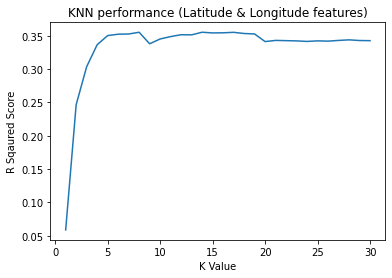

In [735]:
# Simpler Version
import matplotlib.pyplot as plt
knn_df1 = properties_df[['Latitude', "Longitude", "Price"]]
knn_df1 = knn_df1.dropna()
knn_df1 = knn_df1.sample(frac=1)

# KNN1 
knn_x1 = knn_df1[["Latitude", "Longitude"]]
knn_y1 = knn_df1[["Price"]]

scores = []
for k in range(1, 31):
    knn1 = KNeighborsRegressor(n_neighbors=k)
    y_pred1 = cross_val_predict(knn1, knn_x1, knn_y1, cv=3)
    scores.append(r2_score(knn_y1, y_pred1))

plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude & Longitude features)")
plt.plot(range(1, 31),scores)

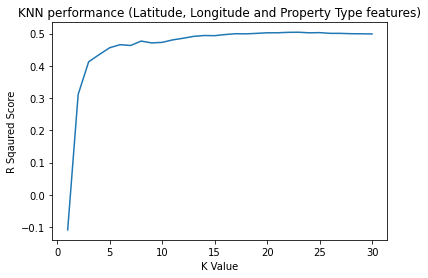

In [736]:
knn_df2 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Price']]
knn_df2 = knn_df2.dropna()
knn_df2 = knn_df2.sample(frac=1)
# KNN2 
knn_x2 = knn_df2[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced']]
knn_y2 = knn_df2['Price']

scores = []
for k in range(1, 31):
    knn2 = KNeighborsRegressor(n_neighbors=k)
    y_pred2 = cross_val_predict(knn2, knn_x2, knn_y2, cv=3)
    scores.append(r2_score(knn_y2, y_pred2))

plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude, Longitude and Property Type features)")
plt.plot(range(1, 31),scores)

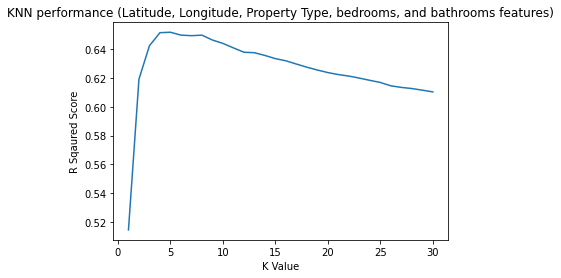

In [737]:
# That's a clear improvement, so now let's have a look at when you include 
# bedrooms and bathrooms
knn_df3 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms',
                         'Price']]
knn_df3 = knn_df3.dropna()
knn_df3 = knn_df3.sample(frac=1)
knn_x3 = knn_df3[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
knn_y3 = knn_df3['Price']

# finding the optimal k value
import matplotlib.pyplot as plt
scores = []
for k in range(1, 31):
    knn3 = KNeighborsRegressor(n_neighbors=k)
    y_pred3 = cross_val_predict(knn3, knn_x3, knn_y3, cv=3)
    scores.append(r2_score(knn_y3, y_pred3))

plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude, Longitude, Property Type, bedrooms, and bathrooms features)")
plt.plot(range(1, 31),scores)

In [778]:
# That's a clear improvement, so now let's have a look at when you include 
# bedrooms and bathrooms
knn_df3 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms',
                         'Price']]
knn_df3 = knn_df3.dropna()
knn_df3 = knn_df3.sample(frac=1)
x3 = knn_df3[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
y3 = knn_df3['Price']

knn3 = KNeighborsRegressor(n_neighbors=8)
# Using a cross validation of 5 folds
y_pred3 = cross_val_predict(knn3, x3, y3, cv=3)
# Evaluation of the KNN2 predictions
print(r2_score(y3, y_pred3))
print(mean_absolute_error(y3, y_pred3))

0.6515011636860923
122873.18407408505


In [779]:
# This is an even larger improvement. So, this is what we want to use for the local similar prices (KNN).
# So, let's add the KNN predictions to our knn3 dataframe, and then after we'll want to use these KNN results
# as our local similar prices feature
knn_df3['KNN'] = y_pred3
knn_df3

,Latitude,Longitude,Detached,Flat,Semi-Detached,Terraced,Bedrooms,Bathrooms,Price,KNN
"79, Queenswood Gardens, London, Greater London E11 3SF",51.564660,0.025200,0,1,0,0,2.0,1.0,151000,269250.000
"44, Joseph Hardcastle Close, London, Greater London SE14 5RQ",51.480076,-0.045385,0,0,0,1,3.0,2.0,570000,628812.500
"59b, Broadhurst Gardens, London, Greater London NW6 3QT",51.546755,-0.182873,0,1,0,0,2.0,2.0,655000,767093.750
"1, Founder Close, London, Greater London E6 6FS",51.510502,0.068441,0,0,0,1,2.0,1.0,225000,292687.500
"23, Woodland Way, Surbiton, Greater London KT5 9QZ",51.378981,-0.278396,0,0,0,1,3.0,1.0,440000,391625.000
...,...,...,...,...,...,...,...,...,...,...
"238, Croham Valley Road, South Croydon, Greater London CR2 7RD",51.351350,-0.059042,0,0,1,0,2.0,1.0,420000,426203.125
"78, Portland Road, London, Greater London N15 4SX",51.586033,-0.074552,0,0,0,1,2.0,1.0,445000,351250.000
"19, St Crispins Close, Southall, Greater London UB1 2UH",51.520420,-0.373590,0,0,0,1,3.0,1.0,407000,411312.500
"6, Seymer Road, Romford, Greater London RM1 4LB",51.584845,0.175253,0,0,0,1,4.0,1.0,465000,434687.500


In [ ]:
# Let's use another dataframe for this regression
prop_dfknn = properties_df[:]
#del prop_dfknn['Local_Similar_Prices']
prop_dfknn["local_prices_knn"] = np.NaN

# Now I need to get these median values into the new dataframe
for i in knn_df3.iterrows():
    prop_dfknn.loc[i[0], "local_prices_knn"] = i[1][9]
prop_dfknn = prop_dfknn.dropna()

del prop_dfknn['Local_Similar_Prices']
del prop_dfknn['Postcode_Area']
del prop_dfknn['Latitude']
del prop_dfknn['Longitude']

C:\Users\jacks\AppData\Local\Temp/ipykernel_45692/144332351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_dfknn["local_prices_knn"] = np.NaN
c:\users\jacks\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [168]:
prop_dfknn = prop_dfknn.sample(frac=1)
prop_dfknn

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,local_prices_knn
"16, Northdown Road, Hornchurch, Greater London RM11 1NE",0.838984,839.592,3.0,1.0,1.553137,370000,0,0,0,1,0,1,435687.5
"Flat 44, Wilmer House, Daling Way, London, Greater London E3 5NW",0.597493,714.000,2.0,1.0,1.549473,275000,0,1,0,0,0,1,488062.5
"13, Hogarth Close, London, Greater London E16 3SR",0.693491,867.030,2.0,1.0,0.863666,412385,0,0,0,1,0,1,323750.0
"283, Hornchurch Road, Hornchurch, Greater London RM12 4TQ",0.768310,929.000,3.0,1.0,2.063444,365000,0,0,1,0,0,1,424562.5
"74, Northumberland Way, Erith, Greater London DA8 3NW",0.517128,1236.000,3.0,1.0,3.458712,385000,0,0,1,0,0,1,402000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"13, Pinley Gardens, Dagenham, Greater London RM9 4RH",0.525918,465.000,2.0,1.0,2.528223,332000,0,0,1,0,0,1,301375.0
"55, Waldegrave Gardens, Upminster, Greater London RM14 1UT",0.250548,253.000,5.0,3.0,3.047577,1175000,0,0,1,0,0,1,613812.5
"Flat 106, Matilda House, St Katharines Way, London, Greater London E1W 1LF",0.360972,585.100,1.0,1.0,1.344471,485000,0,1,0,0,0,1,601750.0
"1d, Barnehurst Avenue, Erith, Greater London DA8 3NE",0.401614,791.000,2.0,1.0,3.427717,275000,0,1,0,0,0,1,252437.5


In [169]:
x_knn = prop_dfknn.drop(['Price'], axis=1).values
y_knn = prop_dfknn['Price'].values
# split the data set into a training and testing set
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(x_knn,y_knn,test_size=0.3,random_state=0)
# Training the model (on the training set)
ml_knn = LinearRegression()
ml_knn.fit(x_train_knn,y_train_knn)
# Predict the test set results
y_pred_knn = ml_knn.predict(x_test_knn)
print(r2_score(y_test_knn, y_pred_knn))

print(mean_absolute_error(y_test_knn, y_pred_knn))

0.673094397130229
72845.39564310818


In [170]:
r_scores_knn = cross_val_score(ml_knn, x_knn, y_knn, cv=3, scoring=r_scorer)
print(r_scores_knn, r_scores_knn.mean())

[0.65569043 0.6339686  0.71016304] 0.6666073544330736


In [225]:
adj_rsq(r_scores_knn.mean(), prop_dfknn)

0.66623622030117

In [171]:
# Now let's try normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data_knn = pd.DataFrame()
for column in prop_dfknn.columns:
    zscores = stats.zscore(prop_dfknn[column].values)
    if zscores.sum() == 0:
        continue
    norm_data_knn[column] = zscores
norm_data_knn = norm_data_knn.dropna(axis=1, how='all')

In [173]:
x1_norm = norm_data_knn.drop(['Price'], axis=1).values
y1_norm = norm_data_knn['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1_norm = LinearRegression()
ml1_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))
print(mean_absolute_error(y1norm_test, y1norm_pred))

0.6730937920433153
0.3178685061338044


In [227]:
r_scores1_knn = cross_val_score(ml1_norm, x1_norm, y1_norm, cv=4, scoring=r_scorer)
print(r_scores1_knn, r_scores1_knn.mean())

[0.72403323 0.64335751 0.6888246  0.6399488 ] 0.6740410375776624


In [228]:
adj_rsq(r_scores1_knn.mean(), norm_data_knn)

0.6736781786539178

In [ ]:
# FEATURE TESTING # 
simp_df = prop_dfknn[['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', "local_prices_knn"]]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

# Now let's try the dummy variable approach with the postcode areas instead of the postcode local similar prices

In [175]:
propA = pd.DataFrame(properties)
propA = propA.T
propA.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null values to numpy  NaN values
propA = propA.replace("NA", np.NaN)
propA = propA.replace("Na", np.NaN)
propA = propA.replace("na", np.NaN)
del propA['Floorplan?']
del propA['Sold_Date']

property_type_dummies = pd.get_dummies(propA['Property Type'])
build_type_dummies = pd.get_dummies(propA['New Build'])
postcode_dummies = pd.get_dummies(propA['Postcode_Area'])


# Now you need to add these to the dataframe
propA = pd.merge(propA, property_type_dummies, left_index=True, right_index=True)
propA = pd.merge(propA, build_type_dummies, left_index=True, right_index=True)
propA = pd.merge(propA, postcode_dummies, left_index=True, right_index=True)

del propA['Property Type']
del propA['New Build']
del propA['Postcode_Area']
propA = propA.dropna()
propA = propA.sample(frac=1)

In [176]:
propA

,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,...,RM7,RM8,RM9,SE1,SE10,SE16,SE18,SE2,SE8,SE9
"41, Morecambe Close, London, Greater London E1 4NH",51.519856,-0.046781,0.142014,613.5480,1.0,1.0,1.211445,325000,0,1,...,0,0,0,0,0,0,0,0,0,0
"20, Shandy Street, London, Greater London E1 4LX",51.520749,-0.043099,0.165393,1067.5646,4.0,1.0,0.956575,620000,0,0,...,0,0,0,0,0,0,0,0,0,0
"112, Southview Drive, Upminster, Greater London RM14 2LL",51.552733,0.238624,0.429978,246.0000,3.0,2.0,3.352957,825000,1,0,...,0,0,0,0,0,0,0,0,0,0
"54, Corporation Street, London, Greater London E15 3HD",51.531183,0.013499,0.192004,853.0000,2.0,1.0,1.633686,433500,0,0,...,0,0,0,0,0,0,0,0,0,0
"5, Candover Road, Hornchurch, Greater London RM12 4TY",51.563306,0.201744,0.882970,797.0000,3.0,1.0,1.777351,390000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"208, Gurney Close, Barking, Greater London IG11 8JZ",51.543088,0.070043,0.563350,883.0000,3.0,1.0,3.108355,355000,0,0,...,0,0,0,0,0,0,0,0,0,0
"12, Chatteris Avenue, Romford, Greater London RM3 8JX",51.601308,0.219493,0.865234,947.0000,3.0,1.0,2.651894,343000,0,0,...,0,0,0,0,0,0,0,0,0,0
"9, Chestnut Avenue, Hornchurch, Greater London RM12 4HW",51.559200,0.189330,0.752133,1327.0000,3.0,1.0,2.613162,395000,0,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 29, Chicksand House, Chicksand Street, London, Greater London E1 5LH",51.518902,-0.068948,0.294958,639.0000,3.0,1.0,1.694831,450000,0,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
xA = propA.drop(['Price'], axis=1).values
yA = propA['Price'].values

# split the data set into a training and testing set
x_trainA,x_testA,y_trainA,y_testA = train_test_split(xA,yA,test_size=0.3,random_state=0)

# Training the model (on the training set)
mlA = LinearRegression()
mlA.fit(x_trainA,y_trainA)
# Predict the test set results
y_predA = mlA.predict(x_testA)
# evaluate the model 

print(r2_score(y_testA, y_predA))
print(mean_absolute_error(y_testA, y_predA))

0.5616741378173753
90965.3154108892


In [178]:
r_scoresA = cross_val_score(mlA, xA, yA, cv=3, scoring=r_scorer)
print(r_scoresA, r_scoresA.mean())

[0.60574867 0.56475438 0.54508025] 0.5718610997329522


In [229]:
adj_rsq(r_scoresA.mean(), propA)

0.5693933342204012

In [ ]:
# You need to normalise the data and perform the same model as you've done just above

# Weakest level of performance is here, just using the Postcode Dummy variables to represent the location

# Now let's use the Postcode Dummies and the KNN in our MLR

In [179]:
propA_knn = pd.DataFrame(properties)
propA_knn = propA_knn.T
propA_knn.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null values to numpy  NaN values
propA_knn = propA_knn.replace("NA", np.NaN)
propA_knn = propA_knn.replace("Na", np.NaN)
propA_knn = propA_knn.replace("na", np.NaN)
del propA_knn['Floorplan?']
del propA_knn['Sold_Date']

property_type_dummies = pd.get_dummies(propA_knn['Property Type'])
build_type_dummies = pd.get_dummies(propA_knn['New Build'])
postcode_dummies = pd.get_dummies(propA_knn['Postcode_Area'])

# Now you need to add these to the dataframe
propA_knn = pd.merge(propA_knn, property_type_dummies, left_index=True, right_index=True)
propA_knn = pd.merge(propA_knn, build_type_dummies, left_index=True, right_index=True)
propA_knn = pd.merge(propA_knn, postcode_dummies, left_index=True, right_index=True)

del propA_knn['Property Type']
del propA_knn['New Build']
del propA_knn['Postcode_Area']

propA_knn = propA_knn.sample(frac=1)

In [181]:
# The KNN 
knn_A = propA_knn[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms', 'Price']]
knn_A = knn_A.dropna()
xA = knn_A[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
yA = knn_A['Price']

knnA = KNeighborsRegressor(n_neighbors=8)
# Using a cross validation of 5 folds
y_predA = cross_val_predict(knnA, xA, yA, cv=3)
# Evaluation of the KNN2 predictions
print(r2_score(yA, y_predA))
print(mean_absolute_error(yA, y_predA))

0.6622937150057867
65727.19851945218


In [182]:
knn_A['KNN'] = y_predA
# Let's use another dataframe for this regression
propA_knn = propA[:]
propA_knn["local_prices_knn"] = np.NaN

# Now I need to get these median values into the dataframe
for i in knn_A.iterrows():
    propA_knn.loc[i[0], "local_prices_knn"] = i[1][9]

propA_knn = propA_knn.dropna()

C:\Users\jacks\AppData\Local\Temp/ipykernel_45692/1918566775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propA_knn["local_prices_knn"] = np.NaN
C:\Users\jacks\AppData\Local\Temp/ipykernel_45692/1918566775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propA_knn.loc[i[0], "local_prices_knn"] = i[1][9]


In [183]:
propA_knn

,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,...,RM8,RM9,SE1,SE10,SE16,SE18,SE2,SE8,SE9,local_prices_knn
"41, Morecambe Close, London, Greater London E1 4NH",51.519856,-0.046781,0.142014,613.5480,1.0,1.0,1.211445,325000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379375.000
"20, Shandy Street, London, Greater London E1 4LX",51.520749,-0.043099,0.165393,1067.5646,4.0,1.0,0.956575,620000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,740372.500
"112, Southview Drive, Upminster, Greater London RM14 2LL",51.552733,0.238624,0.429978,246.0000,3.0,2.0,3.352957,825000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671875.000
"54, Corporation Street, London, Greater London E15 3HD",51.531183,0.013499,0.192004,853.0000,2.0,1.0,1.633686,433500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399312.500
"5, Candover Road, Hornchurch, Greater London RM12 4TY",51.563306,0.201744,0.882970,797.0000,3.0,1.0,1.777351,390000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,431125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"208, Gurney Close, Barking, Greater London IG11 8JZ",51.543088,0.070043,0.563350,883.0000,3.0,1.0,3.108355,355000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381062.500
"12, Chatteris Avenue, Romford, Greater London RM3 8JX",51.601308,0.219493,0.865234,947.0000,3.0,1.0,2.651894,343000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343436.625
"9, Chestnut Avenue, Hornchurch, Greater London RM12 4HW",51.559200,0.189330,0.752133,1327.0000,3.0,1.0,2.613162,395000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376750.000
"Flat 29, Chicksand House, Chicksand Street, London, Greater London E1 5LH",51.518902,-0.068948,0.294958,639.0000,3.0,1.0,1.694831,450000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359375.000


In [184]:
xA_knn = propA_knn.drop(['Price'], axis=1).values
yA_knn = propA_knn['Price'].values
# split the data set into a training and testing set
xA_train_knn,xA_test_knn,yA_train_knn,yA_test_knn = train_test_split(xA_knn,yA_knn,test_size=0.3,random_state=0)
# Training the model (on the training set)
mlA_knn = LinearRegression()
mlA_knn.fit(xA_train_knn,yA_train_knn)
# Predict the test set results
yA_pred_knn = mlA_knn.predict(xA_test_knn)
print(r2_score(yA_test_knn, yA_pred_knn))

print(mean_absolute_error(yA_test_knn, yA_pred_knn))

0.6722968527297821
72444.59241435747


In [185]:
r_scoresA_knn = cross_val_score(mlA_knn, xA_knn, yA_knn, cv=3, scoring=r_scorer)
print(r_scoresA_knn, r_scoresA_knn.mean())

[0.7162497  0.65825266 0.6452323 ] 0.6732448906915723


In [230]:
adj_rsq(r_scoresA_knn.mean(), propA_knn)

0.6713332200873416

In [187]:
# Now lets normalise the data 
# Now let's try normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data_Aknn = pd.DataFrame()
for column in propA_knn.columns:
    zscores = stats.zscore(propA_knn[column].values)
    if zscores.sum() == 0:
        continue
    norm_data_Aknn[column] = zscores
norm_data_Aknn = norm_data_Aknn.dropna(axis=1, how='all')

In [232]:
x1_norm = norm_data_Aknn.drop(['Price'], axis=1).values
y1_norm = norm_data_Aknn['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1A_norm = LinearRegression()
ml1A_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1A_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))
#print(mean_absolute_error(y1norm_test, y1norm_pred))

0.671808538107534


In [234]:
r_scoresA_knn = cross_val_score(ml1A_norm, x1_norm, y1_norm, cv=3, scoring=r_scorer)
print(r_scoresA_knn, r_scoresA_knn.mean())

[0.71605558 0.63587881 0.64487782] 0.6656040705781868


In [235]:
adj_rsq(r_scoresA_knn.mean(), norm_data_Aknn)

0.6638212390686716